In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.datasets import load_iris
my_iris = load_iris()

In [19]:
df_iris = pd.DataFrame(my_iris.data, columns = my_iris.feature_names)
df_iris['target'] = my_iris.target

In [20]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
dir(my_iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [22]:
df_iris['flower'] = my_iris.target_names[df_iris['target']]

In [23]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
df0 = df_iris[:50]
df1 = df_iris[51:100] 
df2 = df_iris[101:150]

In [26]:
df0.nunique()

sepal length (cm)    15
sepal width (cm)     16
petal length (cm)     9
petal width (cm)      6
target                1
flower                1
dtype: int64

In [27]:
df1.nunique()

sepal length (cm)    20
sepal width (cm)     14
petal length (cm)    19
petal width (cm)      9
target                1
flower                1
dtype: int64

In [28]:
df2.nunique()

sepal length (cm)    21
sepal width (cm)     13
petal length (cm)    20
petal width (cm)     12
target                1
flower                1
dtype: int64

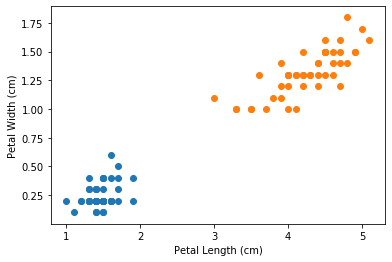

In [36]:
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
#plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])

In [37]:
X = df_iris.drop(['target','flower'],axis='columns')
y = df_iris.target

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [41]:
print(len(X_train),"-",len(X_test))

120 - 30


In [57]:
from sklearn.neighbors import KNeighborsClassifier
my_neigh = KNeighborsClassifier(n_neighbors = 10)

In [58]:
my_neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [59]:
my_neigh.score(X_test,y_test)

0.9666666666666667

In [60]:
from sklearn.metrics import confusion_matrix

In [67]:
y_pred = my_neigh.predict(X_test)
my_cm = confusion_matrix(y_test,y_pred) 
my_cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(42.0, 0.5, 'Actual')

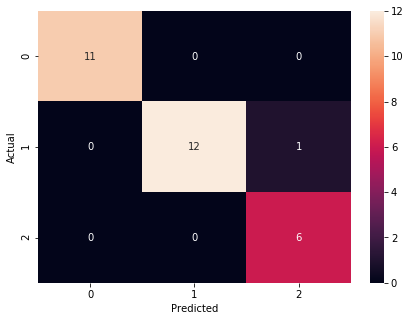

In [68]:
plt.figure(figsize=(7,5))
sn.heatmap(my_cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

